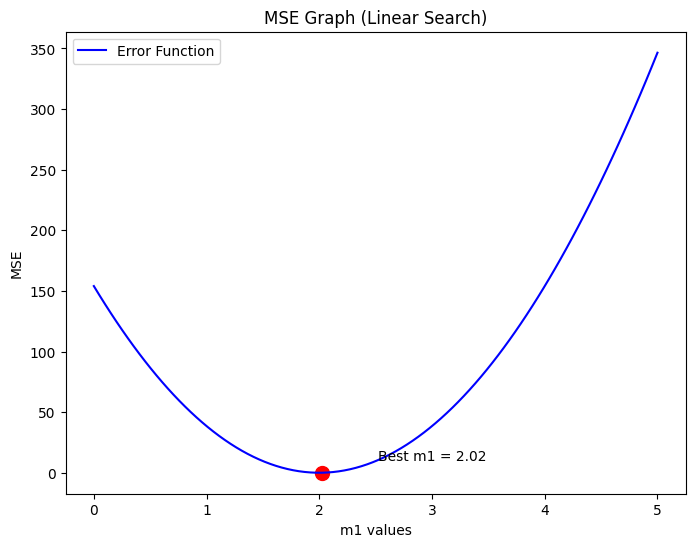

Best m1 from Linear Search: 2.0202020202020203
Best m1 from Gradient Descent: 1.9747843268114817
MSE from Gradient Descent: 0.006604320103922182


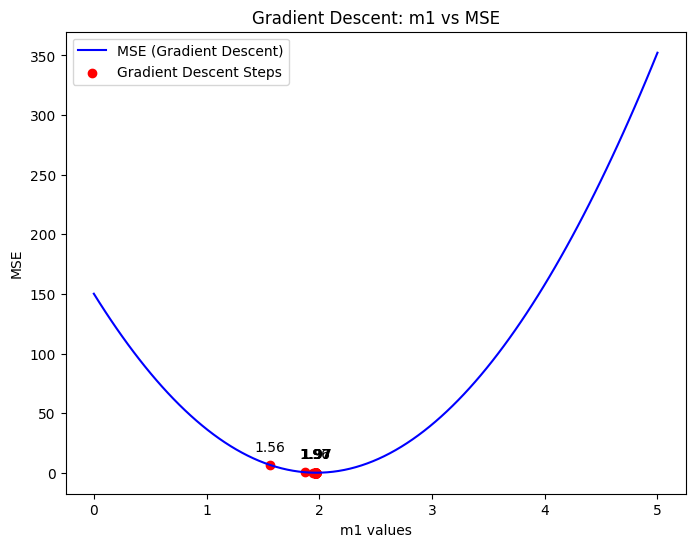

(1.9747843268114817, 1.1755470376539956)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#DataSet
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([3, 5, 7, 9, 11, 13, 15, 17, 19, 21])

#MSE Calc
def mse(m1, m2, x, y):
    y_pred = (m1 * x) + m2
    return np.mean((y - y_pred) ** 2)

#Linear Search for Best m1
def loss_function(x, y):
    m_values = np.linspace(0, 5, 100)
    losses = [mse(m, 1, x, y) for m in m_values]
    best_m = m_values[np.argmin(losses)]

    plt.figure(figsize=(8, 6))
    plt.plot(m_values, losses, label='Error Function', color='blue')

    min_loss_idx = np.argmin(losses)
    min_loss_m1 = m_values[min_loss_idx]
    min_loss_value = losses[min_loss_idx]
    plt.scatter(min_loss_m1, min_loss_value, color='red', s=100, marker='o')
    plt.annotate(f'Best m1 = {min_loss_m1:.2f}',
                 xy=(min_loss_m1, min_loss_value),
                 xytext=(min_loss_m1 + 0.5, min_loss_value + 10))

    plt.xlabel('m1 values')
    plt.ylabel('MSE')
    plt.title('MSE Graph (Linear Search)')
    plt.legend()
    plt.show()

    return best_m

# Gradient Descent for Best m1
def gradient_descent(x, y):
    learning_rate = 0.01
    m1_gd, m2_gd = 0.1, 1
    loss_values = []
    m1_vals = []

    for _ in range(100):
        gradient_m1 = -2 * np.mean(x * (y - (m1_gd * x + m2_gd)))
        gradient_m2 = -2 * np.mean(y - (m1_gd * x + m2_gd))

        m1_gd -= learning_rate * gradient_m1
        m2_gd -= learning_rate * gradient_m2
        loss_values.append(mse(m1_gd, m2_gd, x, y))
        m1_vals.append(m1_gd)

    print(f"Best m1 from Gradient Descent: {m1_gd}")
    print(f"MSE from Gradient Descent: {loss_values[-1]}")

    plt.figure(figsize=(8, 6))
    m1_range = np.linspace(0, 5, 100)
    mse_range = [mse(m1, m2_gd, x, y) for m1 in m1_range]

    plt.plot(m1_range, mse_range, label='MSE (Gradient Descent)', color='blue')
    plt.scatter(m1_vals, loss_values, color='red', marker='o', label='Gradient Descent Steps')
    pts = 10
    idx = np.linspace(0, len(m1_vals) - 1, pts, dtype=int)
    for i in idx:
        plt.annotate(f"{m1_vals[i]:.2f}", (m1_vals[i], loss_values[i]), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.xlabel('m1 values')
    plt.ylabel('MSE')
    plt.title('Gradient Descent: m1 vs MSE')
    plt.legend()
    plt.show()

    return m1_gd, m2_gd

print("Best m1 from Linear Search:", loss_function(x, y))
gradient_descent(x, y)

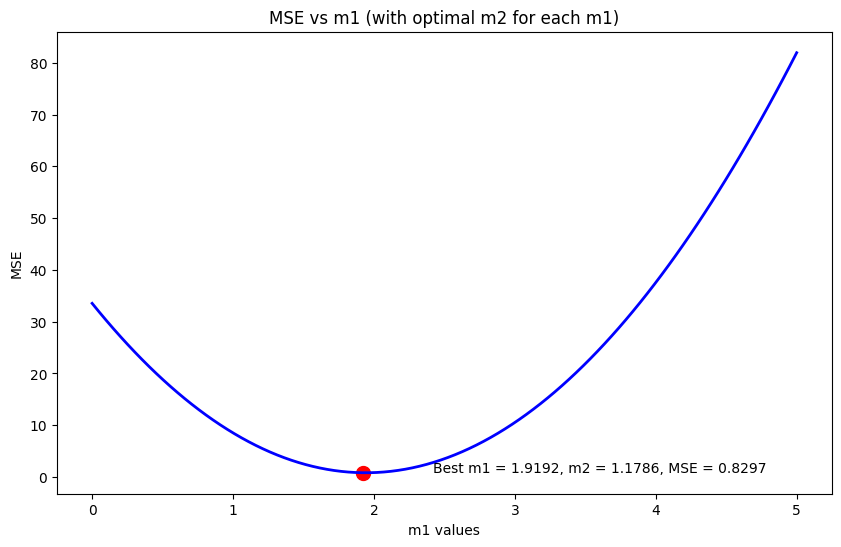

Linear Search Result: m1 = 1.9192, m2 = 1.1786, MSE = 0.8297


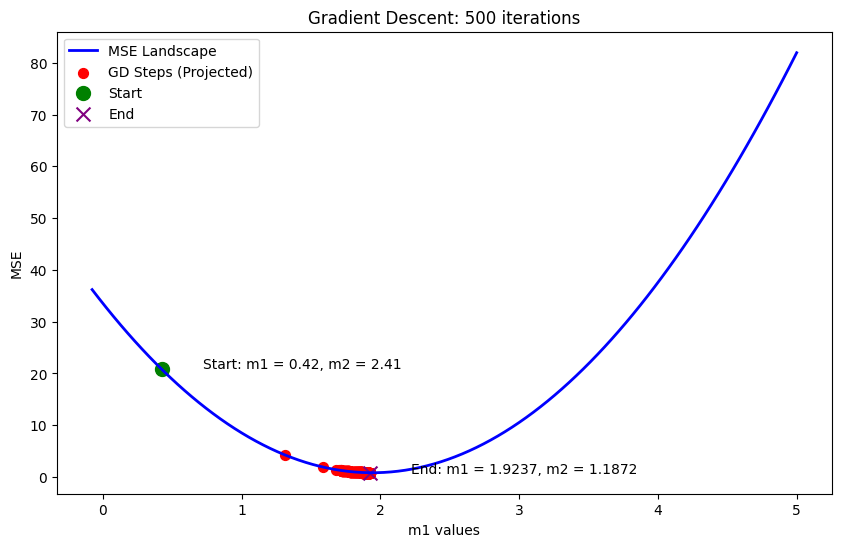

Gradient Descent Result: m1 = 1.9237, m2 = 1.1872, MSE = 0.8290


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n_samples=50, m1_true=2.0, m2_true=1.0, random_seed=42):
    # Data with equation y = m1*x + m2 + noise
    np.random.seed(random_seed)
    x = np.linspace(0, 10, n_samples)
    noise = np.random.normal(0, 1, n_samples)
    y = m1_true * x + m2_true + noise
    return x, y

def calculate_mse(x, y, m1, m2):
    # Calculating MSE
    y_pred = m1 * x + m2
    return np.mean((y - y_pred) ** 2)

def plot_linear_search(x, y, m1_range=None, num_points=100):
    # Plotting MSE
    if m1_range is None:
        m1_range = np.linspace(0, 5, num_points)

    # Calculating optimal m2
    m2_values = np.array([np.mean(y - m1 * x) for m1 in m1_range])

    # Calculating MSE for each (m1, m2) pair
    mse_values = np.array([calculate_mse(x, y, m1, m2)
                          for m1, m2 in zip(m1_range, m2_values)])

    best_idx = np.argmin(mse_values)
    best_m1 = m1_range[best_idx]
    best_m2 = m2_values[best_idx]
    min_loss = mse_values[best_idx]

    # Plot Creation
    plt.figure(figsize=(10, 6))
    plt.plot(m1_range, mse_values, 'b-', linewidth=2)
    plt.scatter(best_m1, min_loss, color='red', s=100, marker='o')
    plt.annotate(f'Best m1 = {best_m1:.4f}, m2 = {best_m2:.4f}, MSE = {min_loss:.4f}',
                 xy=(best_m1, min_loss),
                 xytext=(best_m1 + 0.5, min_loss + 0.1))

    plt.xlabel('m1 values')
    plt.ylabel('MSE')
    plt.title('MSE vs m1 (with optimal m2 for each m1)')
    plt.savefig('linear_search_graph.png')
    plt.show()

    return best_m1, best_m2, min_loss

def optimal_m2_for_m1(x, y, m1):
    # Calculating optimal m2
    return np.mean(y - m1 * x)

def create_mse_landscape(x, y, m1_range):
    # Plotting MSE
    m2_optimal = np.array([optimal_m2_for_m1(x, y, m1) for m1 in m1_range])
    mse_values = np.array([calculate_mse(x, y, m1, m2)
                          for m1, m2 in zip(m1_range, m2_optimal)])
    return m2_optimal, mse_values

def plot_gradient_descent(x, y, initial_m1=None, initial_m2=None,
                          learning_rate=0.01, max_iterations=None,
                          convergence_threshold=1e-6):
    if initial_m1 is None:
        initial_m1 = np.random.uniform(0, 3)
    if initial_m2 is None:
        initial_m2 = np.random.uniform(0, 3)
    if max_iterations is None:
        max_iterations = 200

    # Initializing parameters
    m1, m2 = initial_m1, initial_m2

    # Trajectory
    m1_history = [m1]
    m2_history = [m2]
    mse_history = [calculate_mse(x, y, m1, m2)]

    # Perform GD
    iterations_performed = 0
    for iteration in range(max_iterations):
        iterations_performed += 1

        # Calculating predictions and error
        y_pred = m1 * x + m2
        error = y - y_pred

        # Calculating gradients
        gradient_m1 = -2 * np.mean(x * error)
        gradient_m2 = -2 * np.mean(error)

        # Parameters
        m1_new = m1 - learning_rate * gradient_m1
        m2_new = m2 - learning_rate * gradient_m2

        # Calculating MSE
        new_mse = calculate_mse(x, y, m1_new, m2_new)

        m1, m2 = m1_new, m2_new
        m1_history.append(m1)
        m2_history.append(m2)
        mse_history.append(new_mse)

        # Check for convergence
        if iteration > 0 and abs(new_mse - mse_history[-2]) < convergence_threshold:
            break

    # Visualization
    plt.figure(figsize=(10, 6))

    m1_min = min(0, min(m1_history) - 0.5)
    m1_max = max(5, max(m1_history) + 0.5)
    m1_range = np.linspace(m1_min, m1_max, 100)

    _, optimal_mse_values = create_mse_landscape(x, y, m1_range)

    optimal_trajectory_mse = []
    for m1_val in m1_history:
        optimal_m2 = optimal_m2_for_m1(x, y, m1_val)
        optimal_mse = calculate_mse(x, y, m1_val, optimal_m2)
        optimal_trajectory_mse.append(optimal_mse)

    # MSE Plot
    plt.plot(m1_range, optimal_mse_values, 'b-', label='MSE Landscape', linewidth=2)
    plt.scatter(m1_history, optimal_trajectory_mse, color='red', s=50, marker='o', label='GD Steps (Projected)')
    plt.scatter(m1_history[0], optimal_trajectory_mse[0], color='green', s=100, marker='o', label='Start')
    plt.scatter(m1_history[-1], optimal_trajectory_mse[-1], color='purple', s=100, marker='x', label='End')
    plt.annotate(f'Start: m1 = {m1_history[0]:.2f}, m2 = {m2_history[0]:.2f}',
                xy=(m1_history[0], optimal_trajectory_mse[0]),
                xytext=(m1_history[0] + 0.3, optimal_trajectory_mse[0] + 0.2))

    plt.annotate(f'End: m1 = {m1_history[-1]:.4f}, m2 = {m2_history[-1]:.4f}',
                xy=(m1_history[-1], optimal_trajectory_mse[-1]),
                xytext=(m1_history[-1] + 0.3, optimal_trajectory_mse[-1] - 0.2))

    plt.xlabel('m1 values')
    plt.ylabel('MSE')
    plt.title(f'Gradient Descent: {iterations_performed} iterations')
    plt.legend()
    plt.savefig('gradient_descent_graph.png')
    plt.show()

    return m1_history[-1], m2_history[-1], mse_history[-1], iterations_performed

def main(random_seed=42):
    np.random.seed(random_seed)

    # Generate data
    x, y = generate_data(n_samples=50, m1_true=2.0, m2_true=1.0, random_seed=random_seed)

    # Linear search
    ls_m1, ls_m2, ls_loss = plot_linear_search(x, y)
    print(f"Linear Search Result: m1 = {ls_m1:.4f}, m2 = {ls_m2:.4f}, MSE = {ls_loss:.4f}")

    # Gradient descent with random initialization
    initial_m1 = np.random.uniform(0, 3)
    initial_m2 = np.random.uniform(0, 3)

    gd_m1, gd_m2, gd_loss, iterations = plot_gradient_descent(
        x, y,
        initial_m1=initial_m1,
        initial_m2=initial_m2,
        learning_rate=0.01,
        max_iterations=500,
        convergence_threshold=1e-6
    )

    print(f"Gradient Descent Result: m1 = {gd_m1:.4f}, m2 = {gd_m2:.4f}, MSE = {gd_loss:.4f}")

if __name__ == "__main__":
    main()